In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

# Virus Spreading 

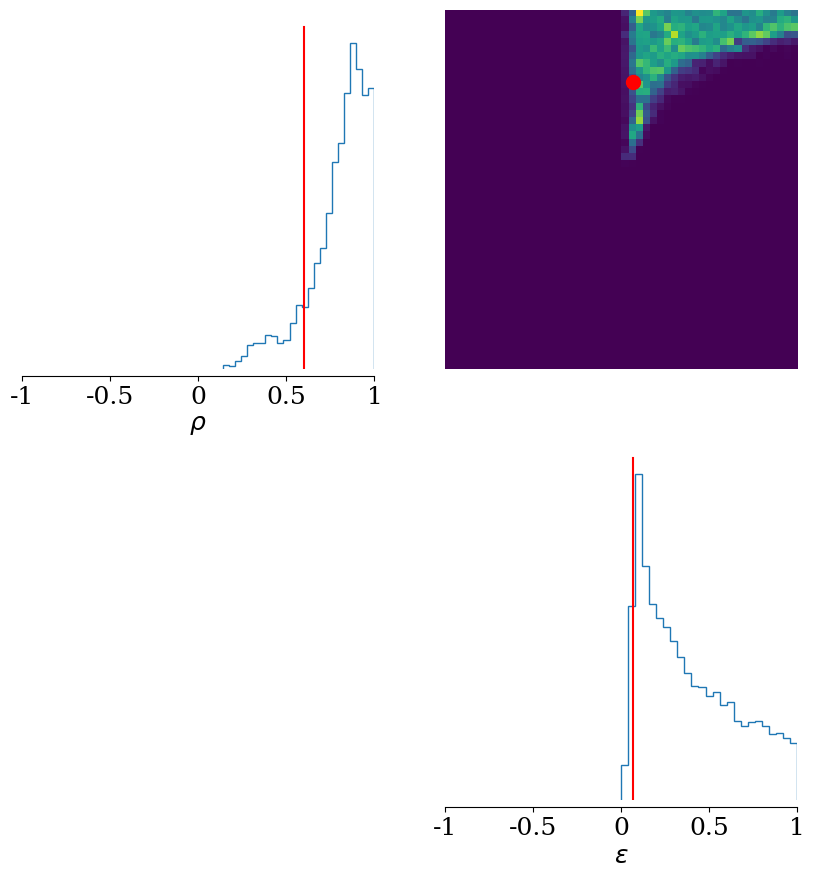

In [8]:
virus = np.loadtxt("../../exp_dir/virus/1712218744.1763186/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(virus, limits=[[-1,1], [-1,1], [-1,1], [-1,1]], points=[np.array([0.6, 0.07])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


In [9]:
file_name = "1712218744.1763186"
with open(f"../../exp_dir/virus/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

print(posterior)

Posterior conditional density p(θ|x) of type MCMCPosterior. It provides MCMC to .sample() from the posterior and can evaluate the _unnormalized_ posterior density with .log_prob().


In [10]:
x = torch.tensor([0.001,
                0.999])

# Assume `posterior` is your DirectPosterior object and `x` is your data
samples = posterior.sample((1000,), x)  # Generate 1000 samples from the posterior
log_probs = posterior.log_prob(samples, x)  # Compute the log probability of the samples

print(samples.shape)
print(log_probs.shape)

# Convert the tensor to a numpy array
samples_np = samples.numpy()


HEREEE
torch.Size([2]) torch.Size([1, 2])
HEREEE
torch.Size([1, 2]) None


Tuning bracket width...:   0%|          | 0/50 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 10100/10100 [11:47<00:00, 14.28it/s]

HEREEE
torch.Size([2]) torch.Size([1, 2])
HEREEE
torch.Size([1, 2]) None
torch.Size([1000, 2])
torch.Size([1000])



/home/pmms2/sbi4abm/sbi4abm/validation/../../sbi4abm/sbi/inference/posteriors/mcmc_posterior.py:172: UserWarning: `.log_prob()` is deprecated for methods that can only evaluate the
            log-probability up to a normalizing constant. Use `.potential()` instead.
  warn(
/home/pmms2/sbi4abm/sbi4abm/validation/../../sbi4abm/sbi/inference/posteriors/mcmc_posterior.py:176: UserWarning: The log-probability is unnormalized!
  warn("The log-probability is unnormalized!")


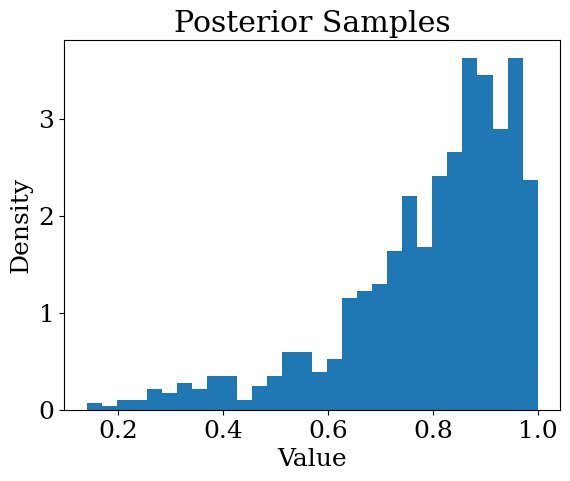

In [14]:
plt.hist(samples_np[:, 0], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior Samples')
plt.show()

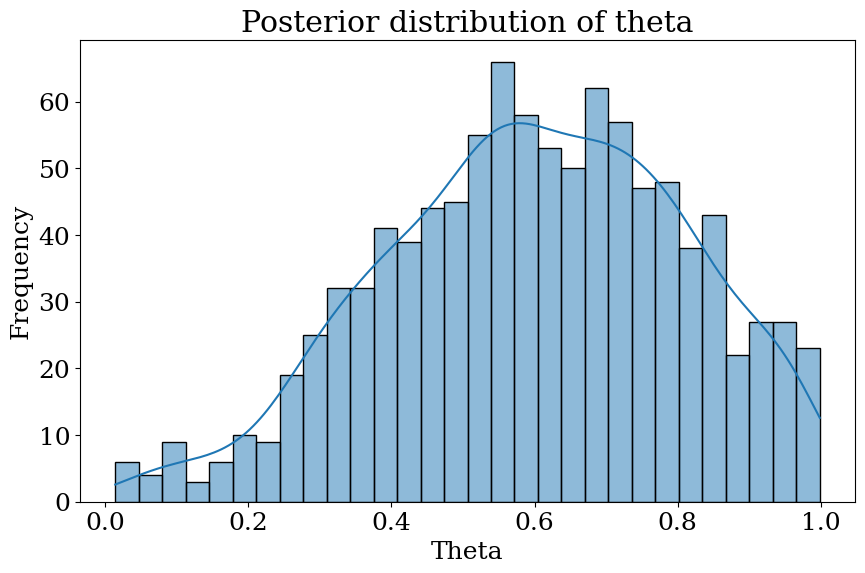

In [38]:
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(samples_np[:, 1], bins=30, kde=True)
plt.title('Posterior distribution of theta')
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.show()

In [5]:
import torch.optim as optim

# Initialize theta at some reasonable starting point
theta_map = torch.zeros(4, requires_grad=True)

# Define optimizer
optimizer = optim.Adam([theta_map], lr=0.01)

print(posterior.log_prob(theta_map, x))

# Optimization loop
for step in range(1000):
    optimizer.zero_grad()
    log_prob = posterior.log_prob(theta_map, x)
    (-log_prob).backward()  # We want to maximize log_prob, so minimize -log_prob
    optimizer.step()

print('MAP estimate of theta:', theta_map.detach().numpy())

NameError: name 'posterior' is not defined

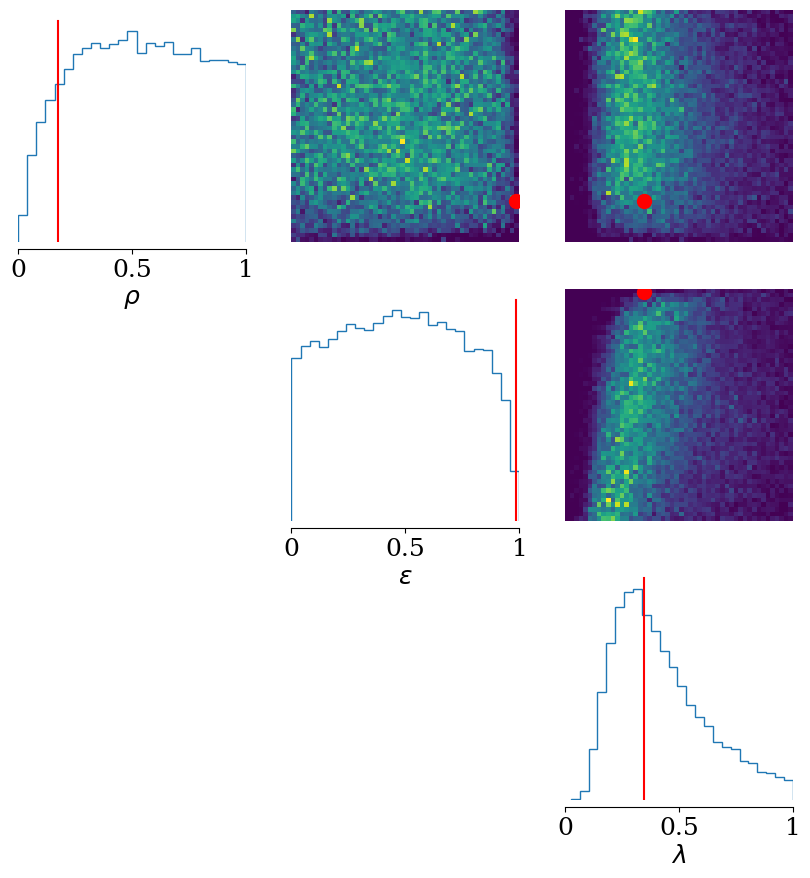

In [5]:
# resnet new resnet architecture (4 blocks, 100 hidden units)
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1714577256.7131488/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


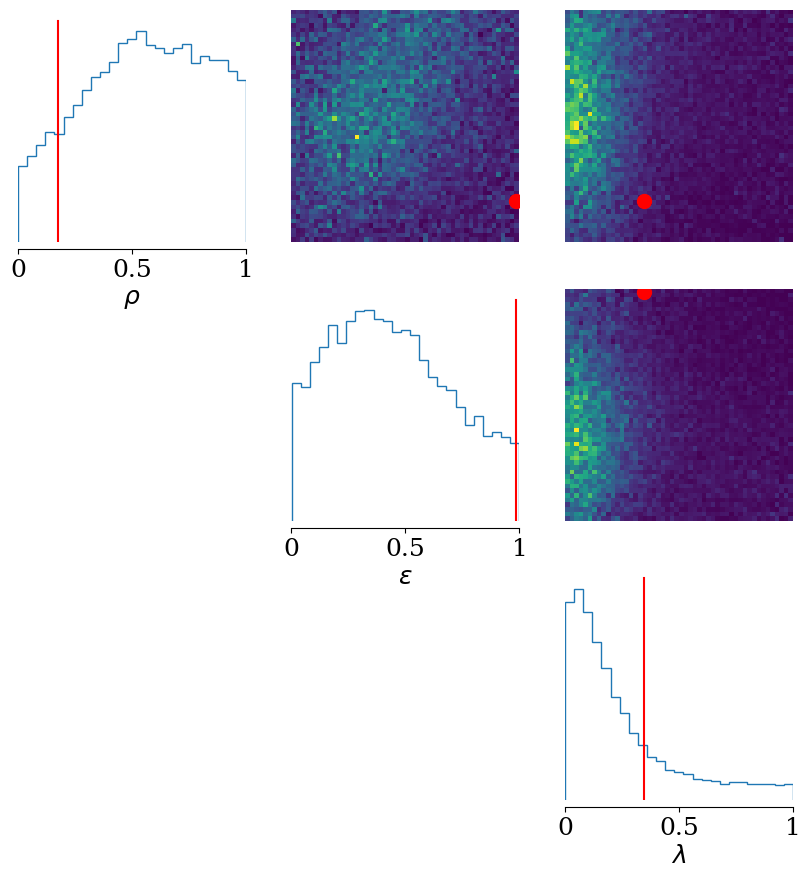

In [8]:
# maf_S
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1714418593.7819936/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


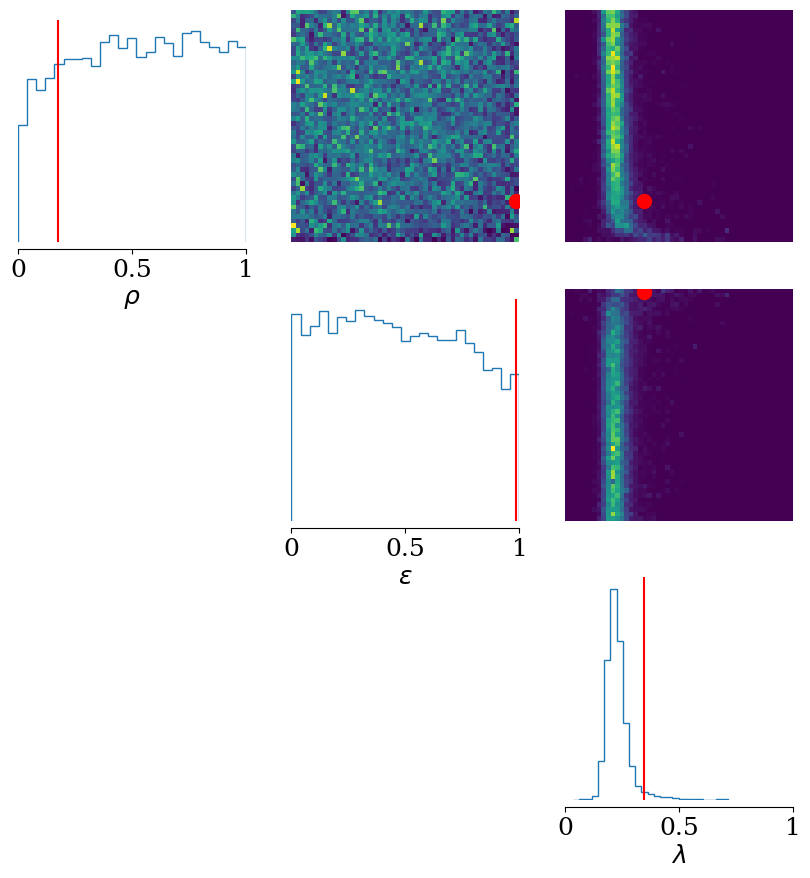

In [13]:
# maf_S
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1713082009.734025/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


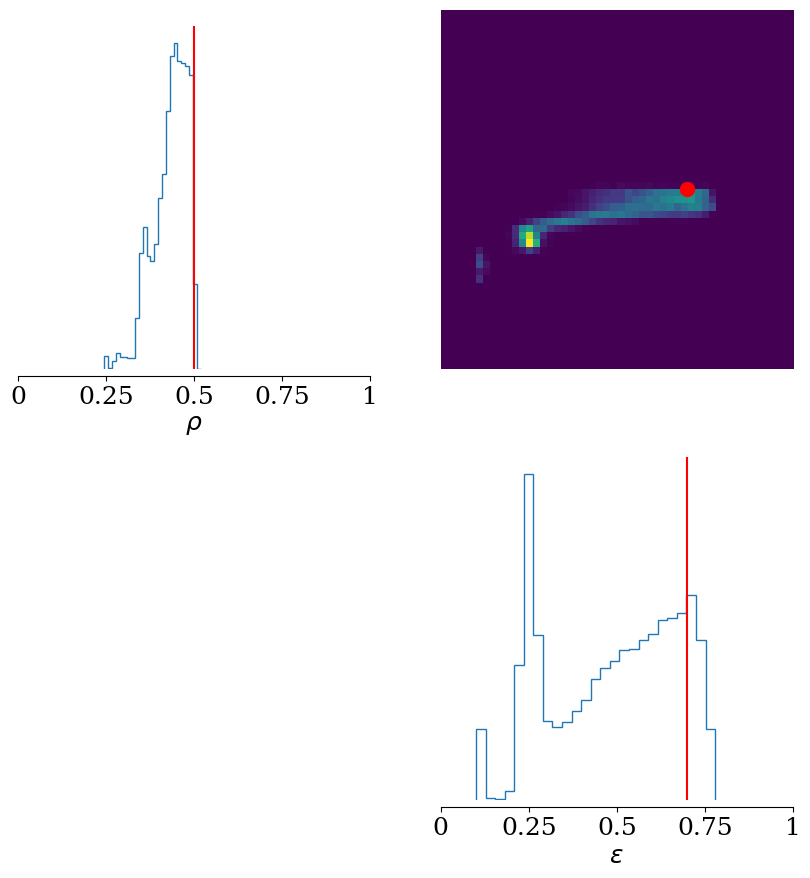

In [8]:
# resnet
segregation = np.loadtxt("../../exp_dir/segregation/resnet_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


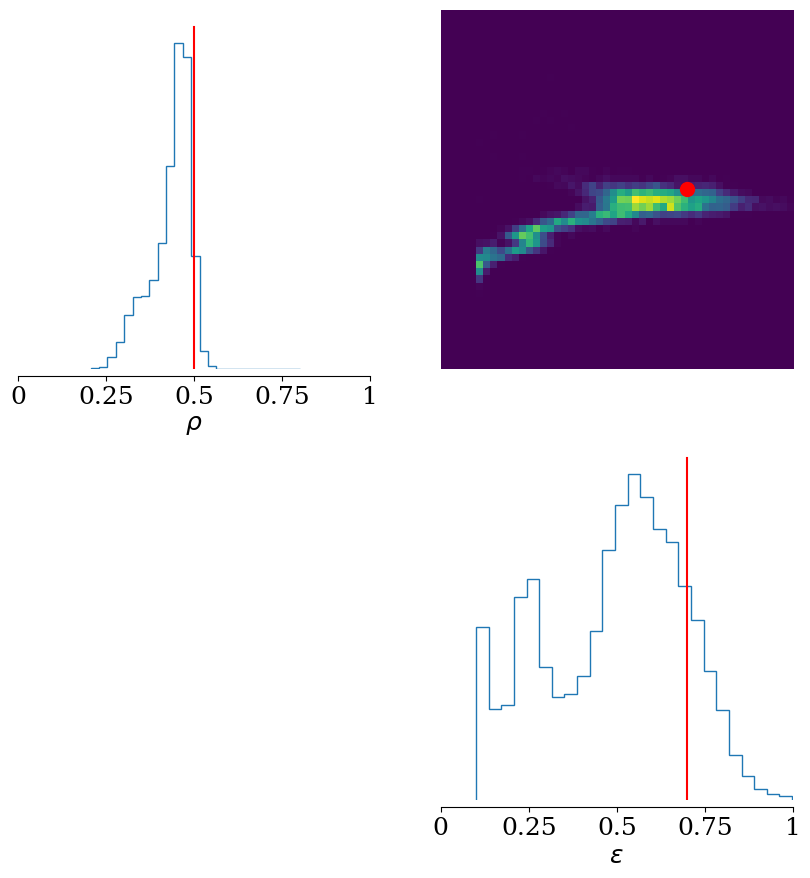

In [4]:
# maf
segregation = np.loadtxt("../../exp_dir/segregation/maf_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


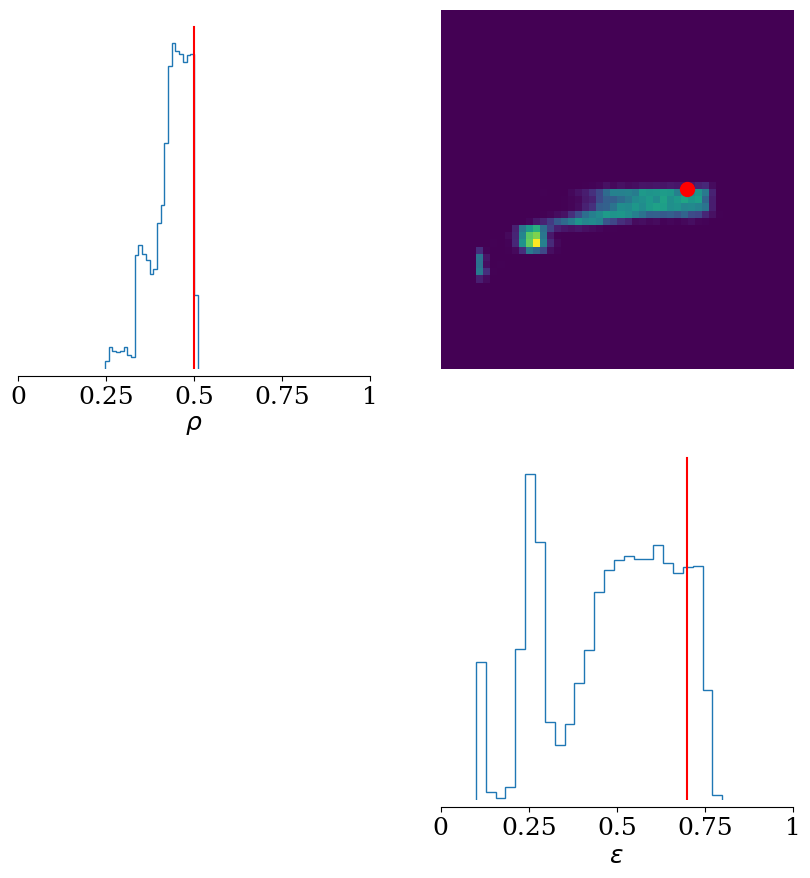

In [4]:
# resnet -> new architecture
segregation = np.loadtxt("../../exp_dir/segregation/1714740228.3274262/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


# Forest Fire

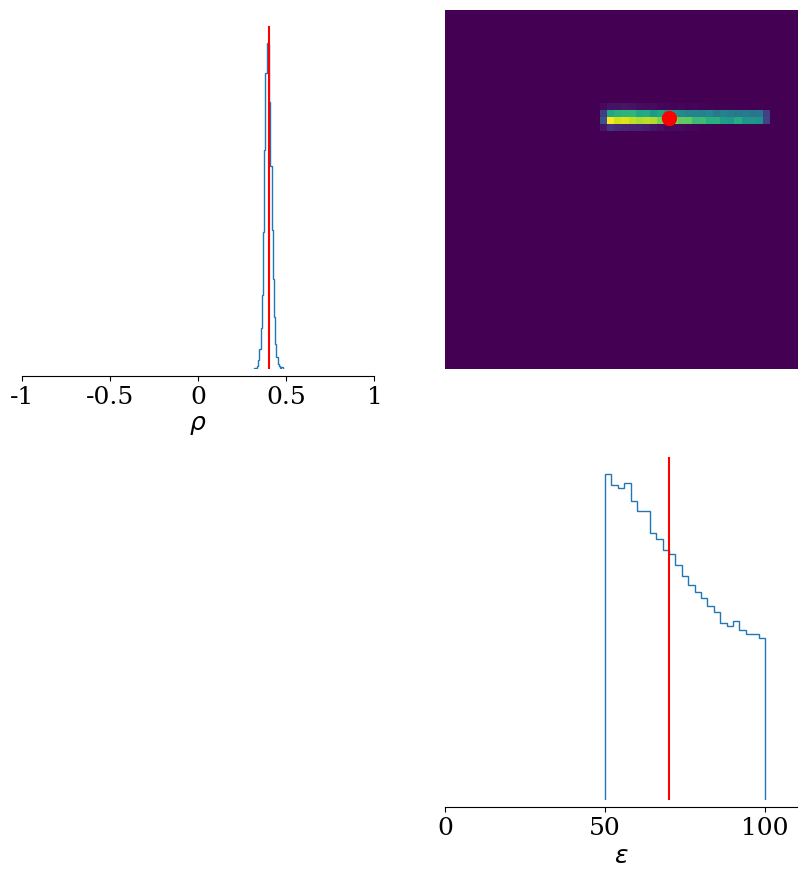

In [4]:
# new architecture

fire = np.loadtxt("../../exp_dir/fire/1714837329.4450836/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fire, limits=[[-1,1], [0,110], [-1,1], [-1,1]], points=[np.array([0.4, 70])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


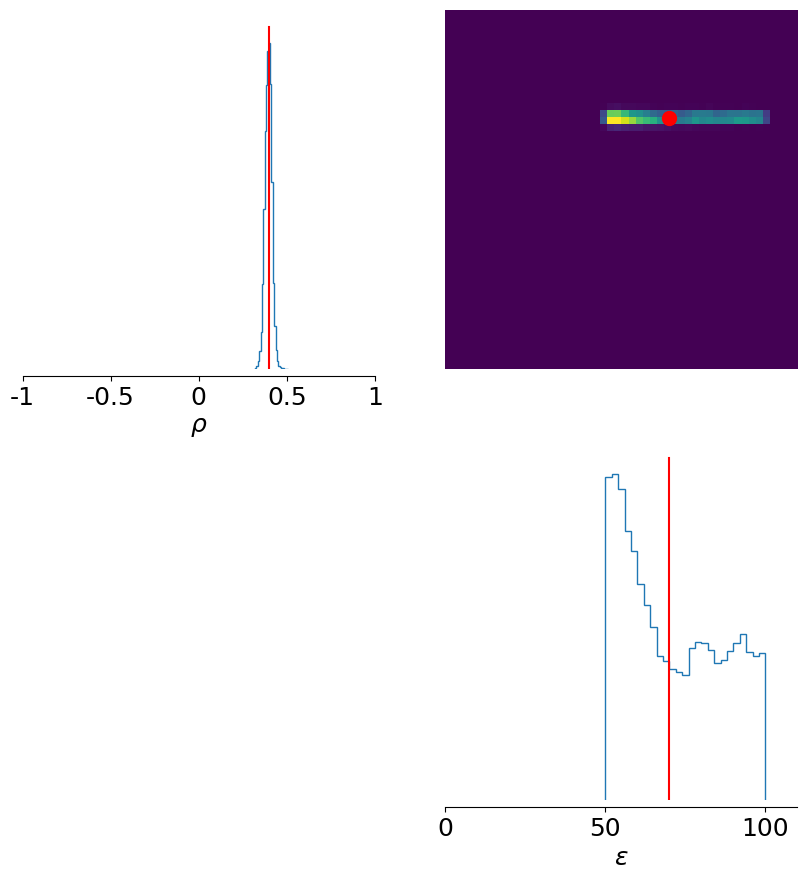

In [10]:
fire = np.loadtxt("../../exp_dir/fire/1712237603.7875483/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fire, limits=[[-1,1], [0,110], [-1,1], [-1,1]], points=[np.array([0.4, 70])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


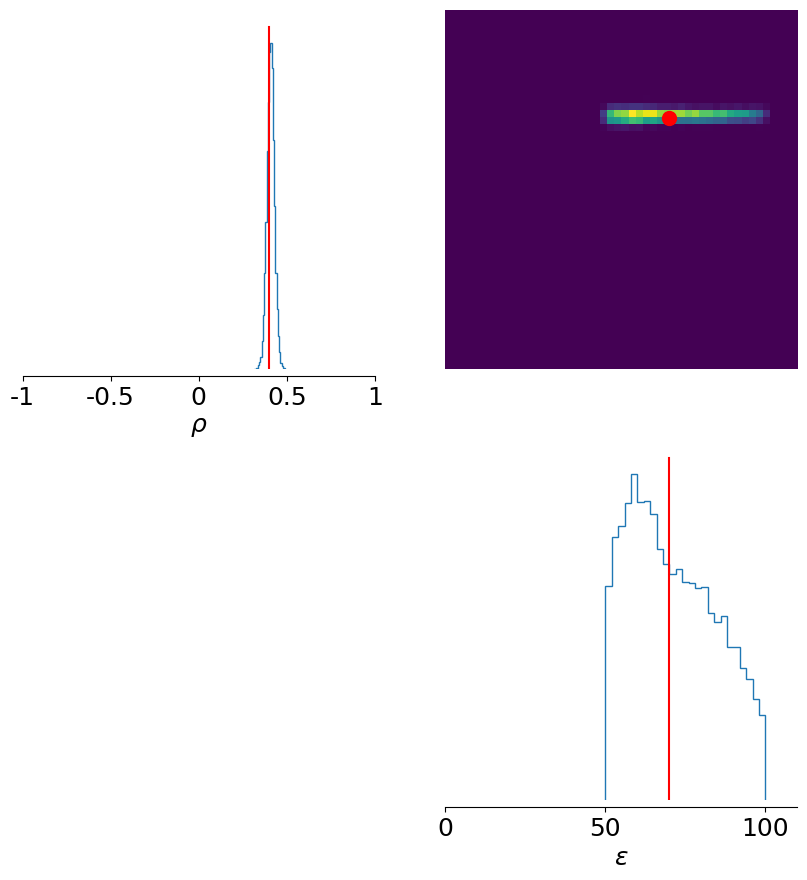

In [14]:
fire = np.loadtxt("../../exp_dir/fire/maf_70000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fire, limits=[[-1,1], [0,110]], points=[np.array([0.4, 70])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


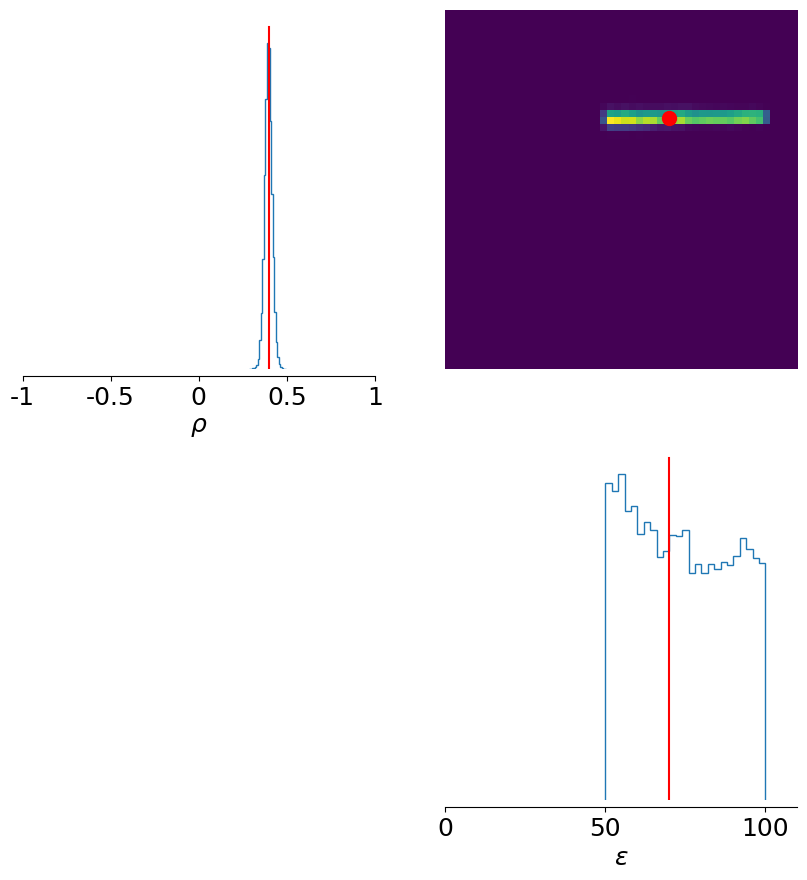

In [13]:
fire = np.loadtxt("../../exp_dir/fire/resnet_80000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fire, limits=[[-1,1], [0,110]], points=[np.array([0.4, 70])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


# Hopfield

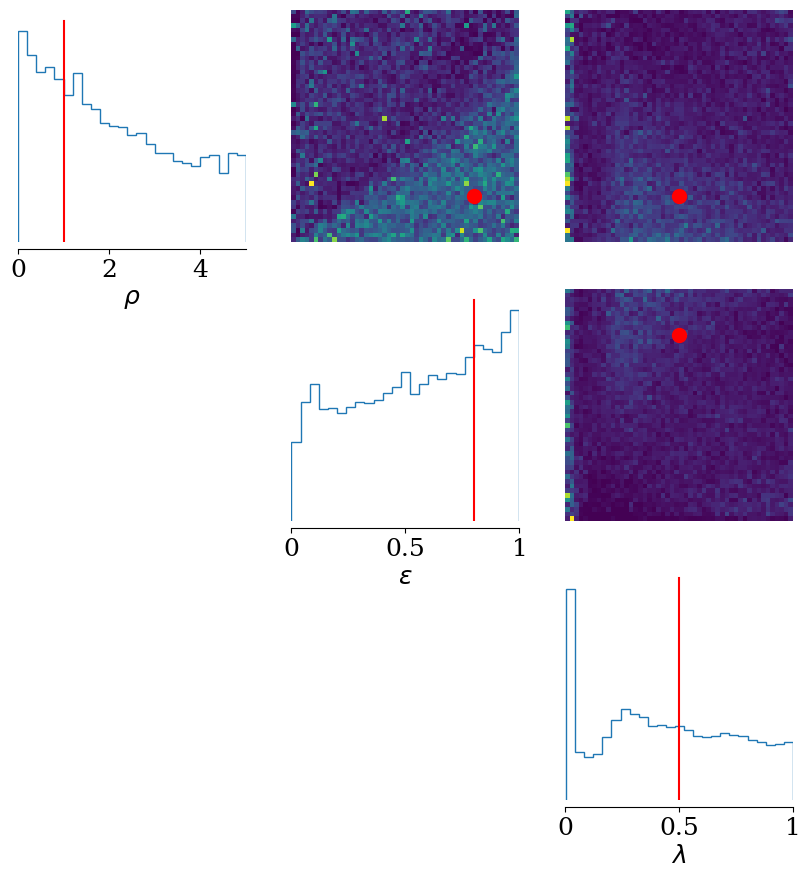

In [13]:
# stats computed with final state for 100,000 samples considering only coherence

hop = np.loadtxt("../../exp_dir/hopfield/1712322807.8384485/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


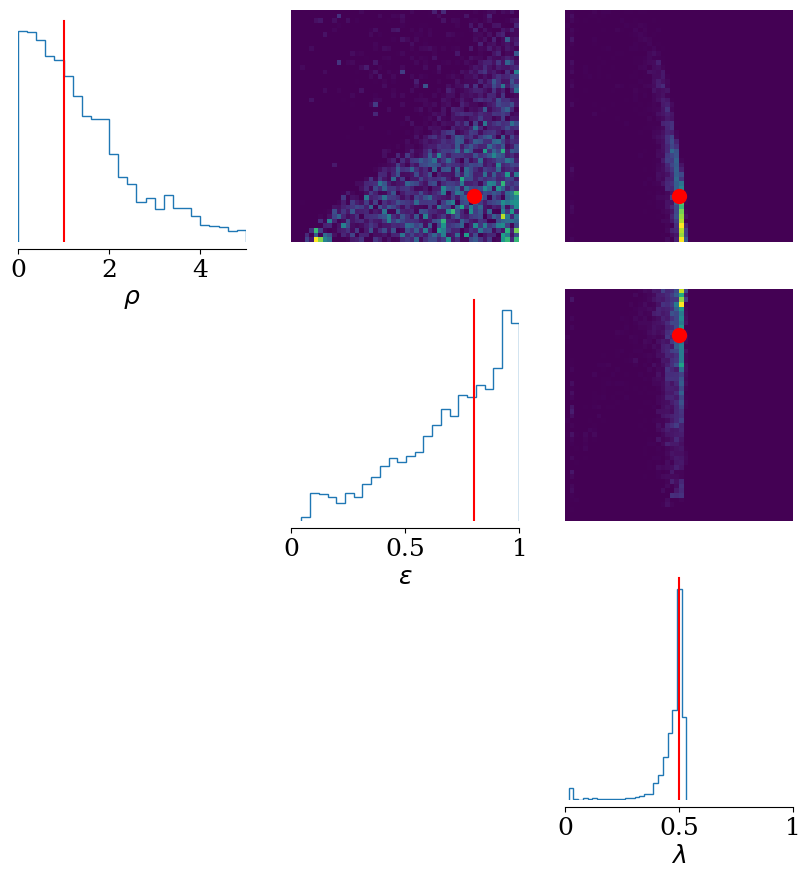

In [12]:
# stats computed with entire time series for 10,000 samples

hop = np.loadtxt("../../exp_dir/hopfield/1712327503.053126/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

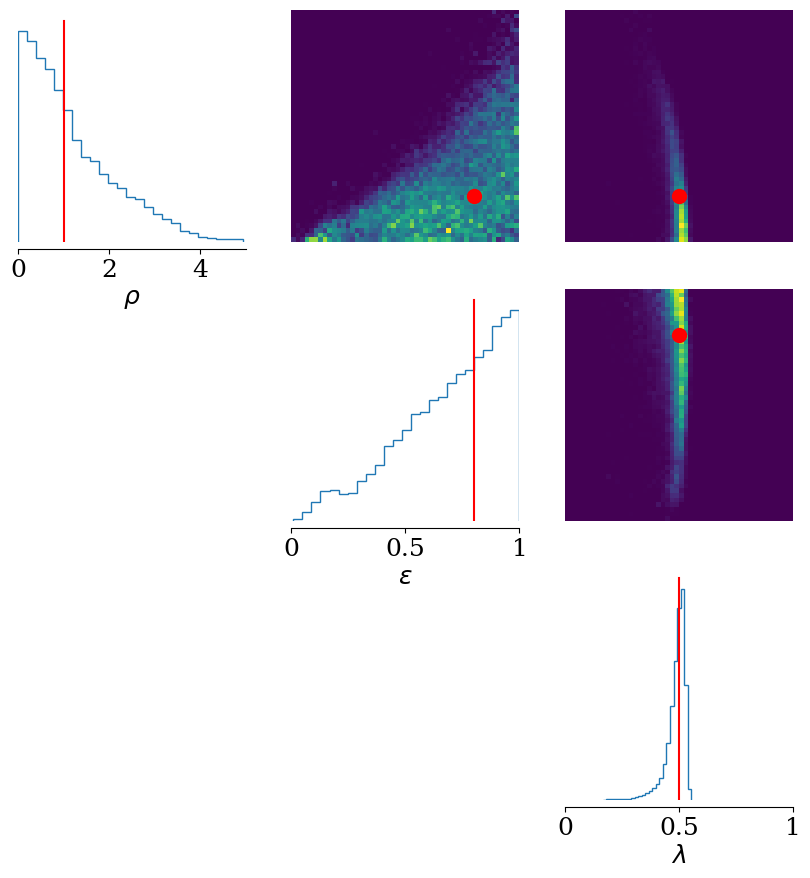

In [14]:
# stats computed with final state for 10,000 samples considering mean and variance of opinions
# and coherence

hop = np.loadtxt("../../exp_dir/hopfield/1712332120.757694/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


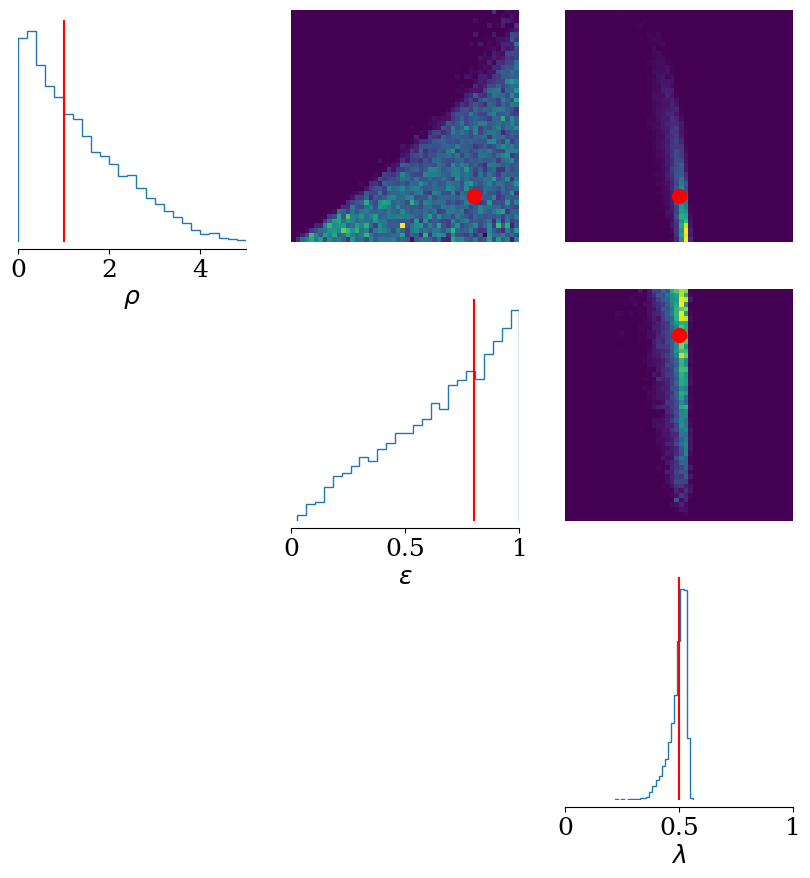

In [12]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence

hop = np.loadtxt("../../exp_dir/hopfield/1712332462.340035/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


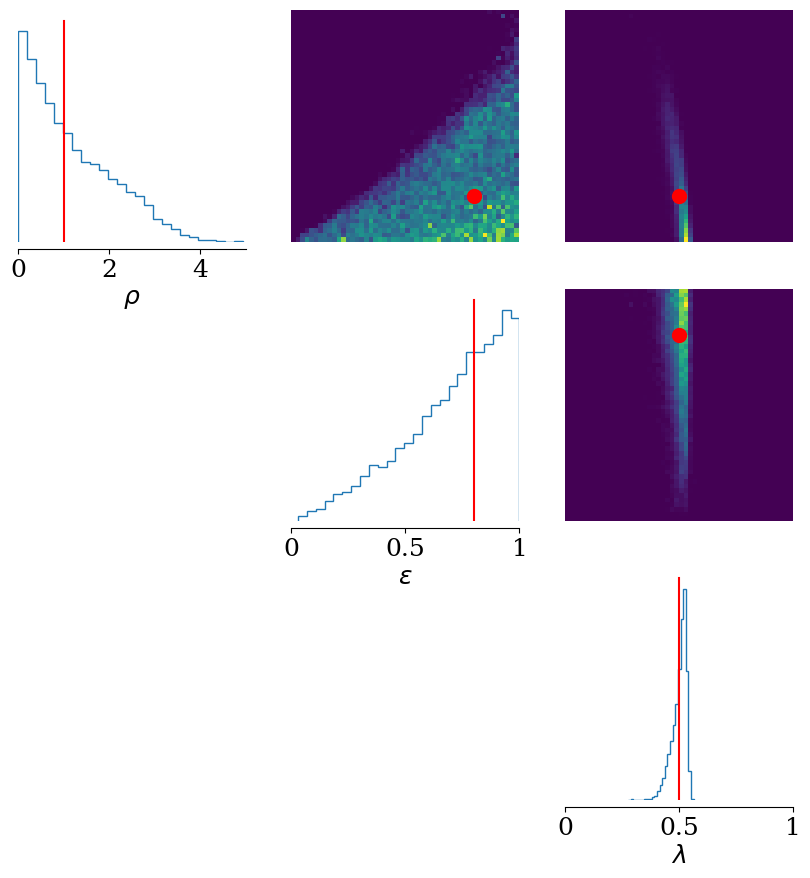

In [5]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence  -----> new resnet architecture

hop = np.loadtxt("../../exp_dir/hopfield/1714597548.2479527/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


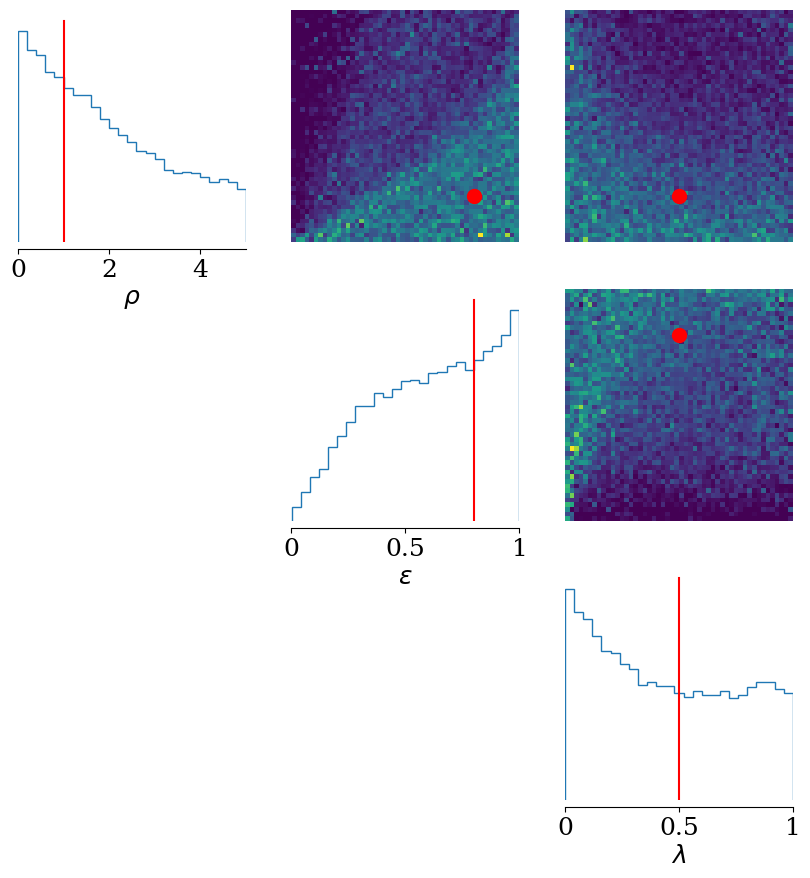

In [34]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence (true statistics) -> mean opinion per topic (2 topcis), variance of opinion
# per topic, and coherence

hop = np.loadtxt("../../exp_dir/hopfield/1712662177.3815513/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


In [11]:
file_name = "1712332462.340035"
with open(f"../../exp_dir/hopfield/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

print(posterior)

Posterior conditional density p(θ|x) of type MCMCPosterior. It provides MCMC to .sample() from the posterior and can evaluate the _unnormalized_ posterior density with .log_prob().


In [12]:
posterior_samples = posterior.sample((200,))

Tuning bracket width...:   0%|          | 0/50 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 2100/2100 [04:23<00:00,  7.98it/s]


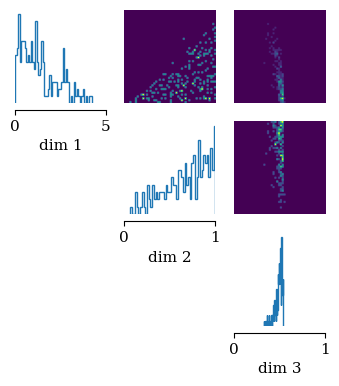

In [13]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

_ = pairplot(posterior_samples, limits=[[0, 5], [0, 1], [0, 1]], figsize=(4, 4))

In [18]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

Tuning bracket width...:   0%|          | 0/50 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 10100/10100 [19:39<00:00,  8.56it/s]
/home/pmms2/sbi4abm/sbi4abm/validation/../../sbi4abm/sbi/inference/posteriors/mcmc_posterior.py:172: UserWarning: `.log_prob()` is deprecated for methods that can only evaluate the
            log-probability up to a normalizing constant. Use `.potential()` instead.
  warn(
/home/pmms2/sbi4abm/sbi4abm/validation/../../sbi4abm/sbi/inference/posteriors/mcmc_posterior.py:176: UserWarning: The log-probability is unnormalized!
  warn("The log-probability is unnormalized!")


AttributeError: 'MCMCPosterior' object has no attribute '_prior'

In [17]:
posterior

MCMCPosterior sampler for potential_fn=<RatioBasedPotential>

In [ ]:
x = torch.tensor([0.11313708, 0.08, -0.08, 0.99360037, 0.99360037])

# Assume `posterior` is your DirectPosterior object and `x` is your data
posterior_samples = posterior.sample((100,), x)  # Generate 1000 samples from the posterior
log_probs = posterior.log_prob(samples, x)  # Compute the log probability of the samples

print(samples.shape)
print(log_probs.shape)

# Convert the tensor to a numpy array
samples_np = samples.numpy()

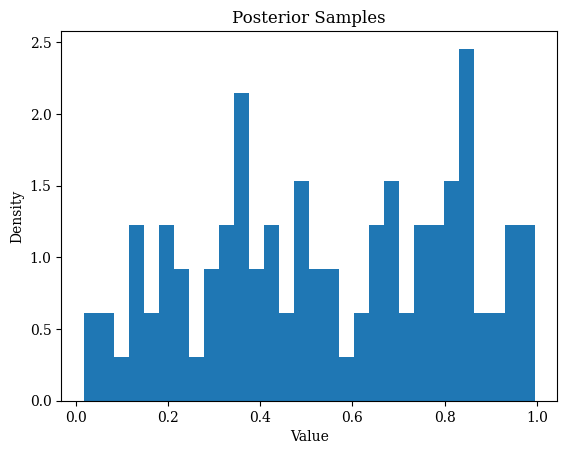

In [13]:
plt.hist(samples_np[:, 2], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior Samples')
plt.show()

# BrockHommes

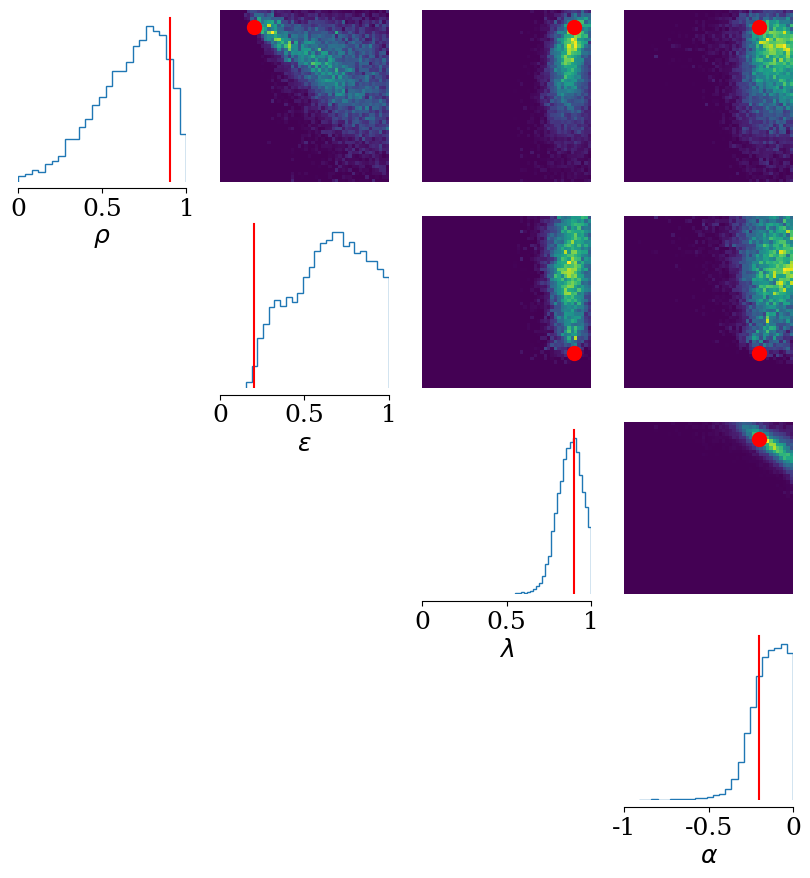

In [6]:
bh_smooth = np.loadtxt("../../exp_dir/brockhommes/1712746281.3394928/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(bh_smooth, limits=[[0,1], [0,1], [0,1], [-1, 0]], points=[np.array([0.9,0.2,0.9,-0.2])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

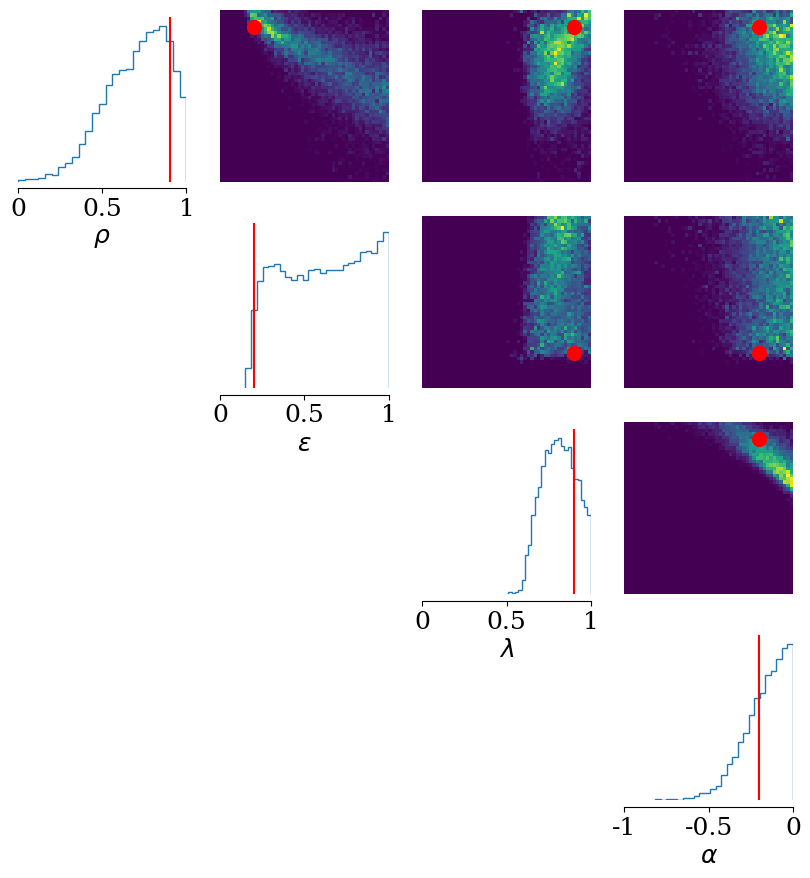

In [4]:
# resnet new architecture
bh_smooth = np.loadtxt("../../exp_dir/brockhommes_smooth/1714582283.4076548/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(bh_smooth, limits=[[0,1], [0,1], [0,1], [-1, 0]], points=[np.array([0.9,0.2,0.9,-0.2])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

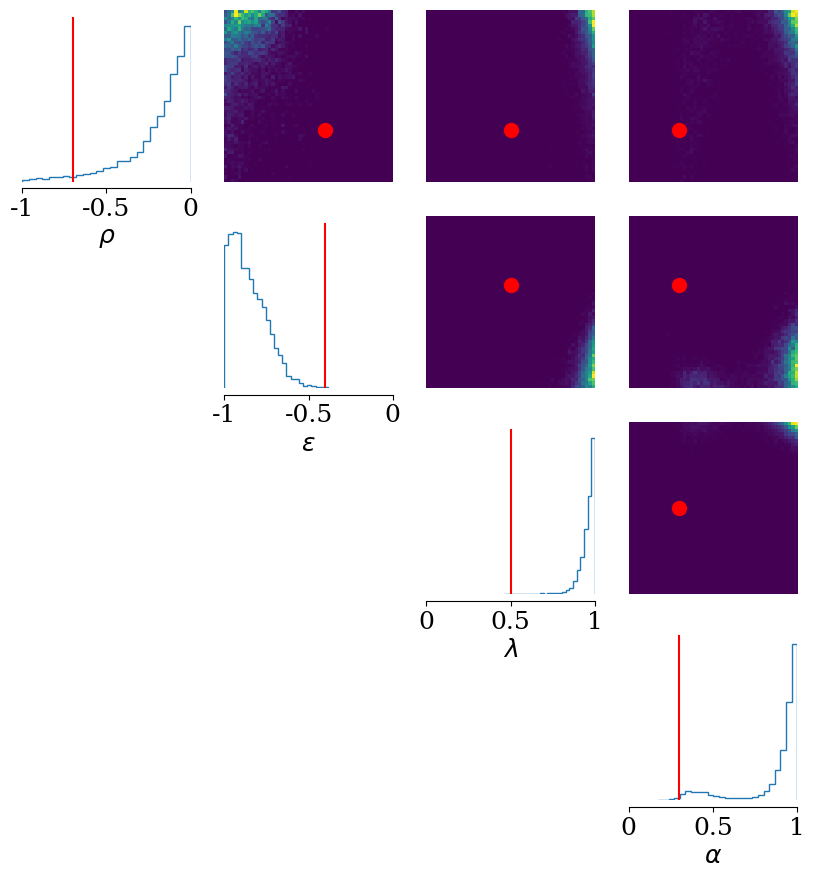

In [6]:
bh_noisy = np.loadtxt("../../exp_dir/brockhommes_noisy/1712761814.3945222/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(bh_noisy, limits=[[-1,0], [-1,0], [0,1], [0, 1]], points=[np.array([-0.7,-0.4,0.5,0.3])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

# Posterior Predictive Checks for Hopfield model

In [35]:
from sbi4abm.utils import io

hopf = io.load_task('hop')

In [36]:
idxs = np.random.randint(hop.shape[0], size=1000)

### Posterior Predictives

In [37]:
pps = []
for idx in idxs:
    data = hopf[0](list(hop[idx]))
    pps.append(data)

In [38]:
posterior_mean_ops_topic_1 = []
posterior_mean_ops_topic_2 = []
posterior_variance_ops_topc_1 = []
posterior_variance_ops_topc_2 = []
posterior_coherence = []

for pp in pps:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    final_state = pp[-1]
    final_s = final_state[:, -2:]
    # Compute mean opinions per topic
    mean_opinions = np.mean(final_s, axis=0)

    # Compute variance in opinions per topic
    variance_opinions = np.var(final_s, axis=0)

    # Compute coherence
    coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
    overall_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

    posterior_mean_ops_topic_1.append(mean_opinions.flatten()[0])
    posterior_mean_ops_topic_2.append(mean_opinions.flatten()[1])
    posterior_variance_ops_topc_1.append(variance_opinions.flatten()[0])
    posterior_variance_ops_topc_2.append(variance_opinions.flatten()[1])
    posterior_coherence.append(overall_coherence)

    # sx = np.concatenate([
    #     np.array([overall_coherence]),  # Make scalar a 1D array
    #     mean_opinions.flatten(),  # Already 1D, flatten() is optional
    #     variance_opinions.flatten()  # Already 1D, flatten() is optional
    # ])

### Prior Predictives

In [39]:
pps_ = []
for idx in idxs:
    data = hopf[0](list(hopf[1].sample().tolist()))
    pps_.append(data)

In [40]:
prior_mean_ops_topic_1 = []
prior_mean_ops_topic_2 = []
prior_variance_ops_topc_1 = []
prior_variance_ops_topc_2 = []
prior_coherence = []

for pp in pps_:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    final_state = pp[-1]
    final_s = final_state[:, -2:]
    # Compute mean opinions per topic
    mean_opinions = np.mean(final_s, axis=0)

    # Compute variance in opinions per topic
    variance_opinions = np.var(final_s, axis=0)

    # Compute coherence
    coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
    overall_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

    prior_mean_ops_topic_1.append(mean_opinions.flatten()[0])
    prior_mean_ops_topic_2.append(mean_opinions.flatten()[1])
    prior_variance_ops_topc_1.append(variance_opinions.flatten()[0])
    prior_variance_ops_topc_2.append(variance_opinions.flatten()[1])
    prior_coherence.append(overall_coherence)

### Observation

In [41]:
final = hopf[2][-1]
final_s = final[:, -2:]

# Compute mean opinions per topic
mean_opinions = np.mean(final_s, axis=0)

# Compute variance in opinions per topic
variance_opinions = np.var(final_s, axis=0)

# Compute coherence
coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
observation_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

observation_mean_ops_topic_1 = mean_opinions.flatten()[0]
observation_mean_ops_topic_2 = mean_opinions.flatten()[1]
observation_variance_ops_topc_1 = variance_opinions.flatten()[0]
observation_variance_ops_topc_2 = variance_opinions.flatten()[1]


In [42]:
from matplotlib.lines import Line2D
import matplotlib.patches as patches

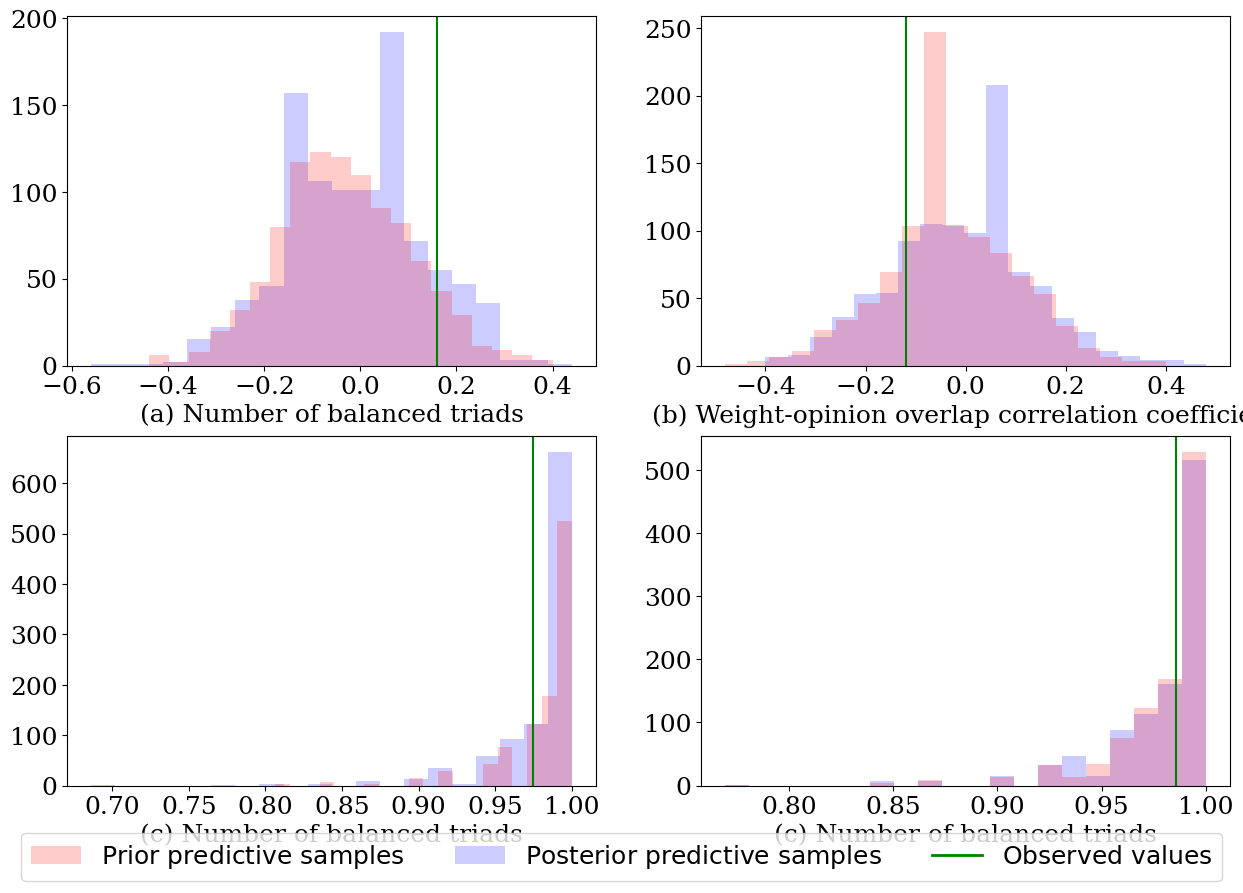

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

axes[0, 0].hist(posterior_mean_ops_topic_1, bins=20, color='b', alpha=0.2)
axes[0, 0].hist(prior_mean_ops_topic_1, bins=20, color='r', alpha=0.2)
axes[0, 0].axvline(observation_mean_ops_topic_1, c='g')
axes[0, 0].set_xlabel(r"(a) Number of balanced triads", fontsize=18)

axes[0, 1].hist(posterior_mean_ops_topic_2, bins=20, color='b', alpha=0.2)
axes[0, 1].hist(prior_mean_ops_topic_2, bins=20, color='r', alpha=0.2)
axes[0, 1].axvline(observation_mean_ops_topic_2, c='g')
axes[0, 1].set_xlabel(r"(b) Weight-opinion overlap correlation coefficient", fontsize=18)

axes[1, 0].hist(posterior_variance_ops_topc_1, bins=20, color='b', alpha=0.2)
axes[1, 0].hist(prior_variance_ops_topc_1, bins=20, color='r', alpha=0.2)
axes[1, 0].axvline(observation_variance_ops_topc_1, c='g')
axes[1, 0].set_xlabel(r"(c) Number of balanced triads", fontsize=18)
                             
axes[1, 1].hist(posterior_variance_ops_topc_2, bins=20, color='b', alpha=0.2)
axes[1, 1].hist(prior_variance_ops_topc_2, bins=20, color='r', alpha=0.2)
axes[1, 1].axvline(observation_variance_ops_topc_2, c='g')
axes[1, 1].set_xlabel(r"(c) Number of balanced triads", fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]

fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=18)

plt.savefig("./overleaf_plots/graph_posterior_predictives.png", dpi=1000, format='png', bbox_inches='tight')

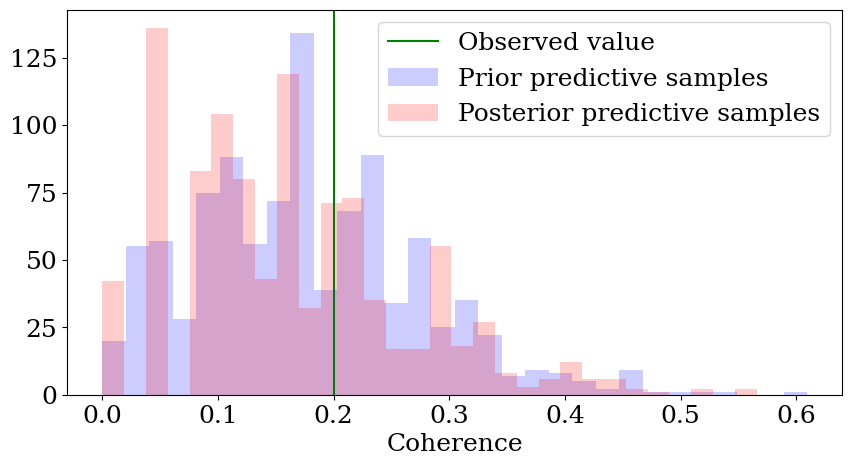

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(posterior_coherence, bins=30, color='b', alpha=0.2)
plt.hist(prior_coherence, bins=30, color='r', alpha=0.2)
plt.axvline(observation_coherence, c='g')
plt.xlabel(r"Coherence", fontsize=18)
plt.legend([r"Observed value", r"Prior predictive samples", r"Posterior predictive samples"], fontsize=18)

In [45]:
n_neg_triads = [] # Average per topic of sentiment values in final time step
glob_clust_coeffs = [] # Global clustering coefficient of networks obtained by keeping edges > 0 otherwise removing
corr_weight_ops = [] # Correlation between the weights of network and overlap in opinion profile
iu1 = np.triu_indices(50)
for pp in pps:
    final = pp[-1].numpy()
    w, s = final[:, :-2], final[:, -2:]
    A = np.sign(w)
    n_neg_triad = np.sum(np.diag(A.dot(A).dot(A)) + 1) / 2
    n_neg_triads.append(n_neg_triad)
    A = (w >= 0).astype(int)
    k = np.sum(A, axis=1)
    glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
    glob_clust_coeffs.append(glob_clust_coeff)
    overlaps = np.dot(s, s.T)[iu1]/2
    weights = w[iu1]
    corr_weight_op = np.corrcoef(weights, overlaps)
    corr_weight_ops.append(corr_weight_op[0,1])

n_neg_triads_ = [] # Average per topic of sentiment values in final time step
glob_clust_coeffs_ = [] # Global clustering coefficient of networks obtained by keeping edges > 0 otherwise removing
corr_weight_ops_ = [] # Correlation between the weights of network and overlap in opinion profile
iu1 = np.triu_indices(50)
for pp in pps_:
    final = pp[-1].numpy()
    w, s = final[:, :-2], final[:, -2:]
    A = np.sign(w)
    n_neg_triad_ = np.sum(np.diag(A.dot(A).dot(A)) + 1) / 2 
    n_neg_triads_.append(n_neg_triad_)
    A = (w >= 0).astype(int)
    k = np.sum(A, axis=1)
    glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
    glob_clust_coeffs_.append(glob_clust_coeff)
    overlaps = np.dot(s, s.T)[iu1]/2
    weights = w[iu1]
    corr_weight_op = np.corrcoef(weights, overlaps)
    corr_weight_ops_.append(corr_weight_op[0,1])

final = hopf[2][-1]
w, s = final[:, :-2], final[:, -2:]
A = np.sign(w)
n_neg_triad = np.sum(np.diag((A.dot(A)).dot(A)) + 1) / 2 
A = (w >= 0).astype(int)
k = np.sum(A, axis=1)
glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
overlaps = np.dot(s, s.T)[iu1]/2
weights = w[iu1]
corr_weight_op = np.corrcoef(weights, overlaps)[0,1]

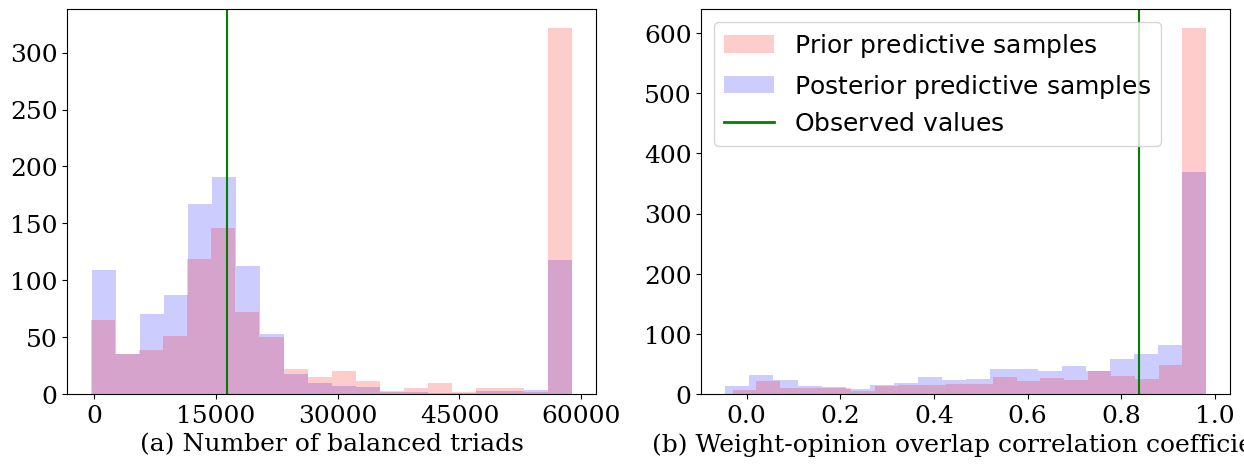

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].hist(n_neg_triads, bins=20, color='b', alpha=0.2)#, density=True)
axes[0].hist(n_neg_triads_, bins=20, color='r', alpha=0.2)#, density=True)
axes[0].axvline(n_neg_triad, c='g')
axes[0].set_xlabel(r"(a) Number of balanced triads", fontsize=18)
axes[0].set_xticks([0, 15000, 30000, 45000, 60000])

axes[1].hist(corr_weight_ops, bins=20, color='b', alpha=0.2)#, density=True)
axes[1].hist(corr_weight_ops_, bins=20, color='r', alpha=0.2)#, density=True)
axes[1].axvline(corr_weight_op, c='g')
axes[1].set_xlabel(r"(b) Weight-opinion overlap correlation coefficient", fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]
axes[1].legend(handles=handles, loc='upper left', ncol=1, fontsize=18)
plt.savefig("./overleaf_plots/graph_posterior_predictives.png", dpi=1000, format='png', bbox_inches='tight')

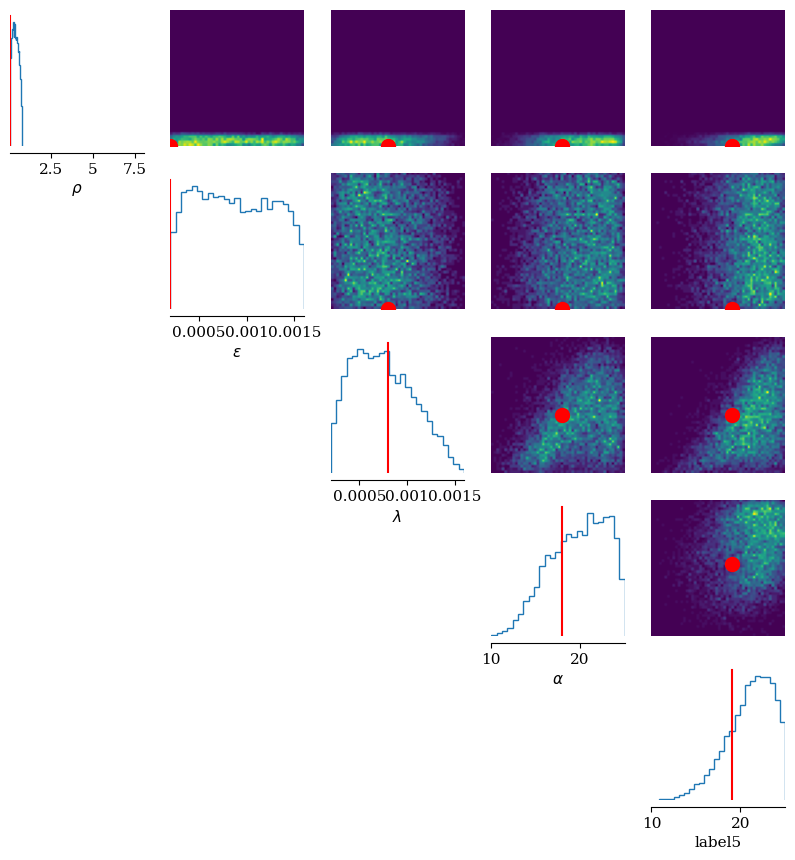

In [19]:
socialcare = np.loadtxt("../../exp_dir/socialcare/1715151754.033255/samples.txt")
plt.rcParams.update({'font.size':11}) # something about latex font
_ = analysis.pairplot(socialcare, limits=[[0.1,8], [0.0002, 0.0016], [0.0002, 0.0016], [10, 25], [10, 25]], 
                      points=[np.array([0.1, 0.0002, 0.0008, 18.0, 19.0])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$", "label5"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

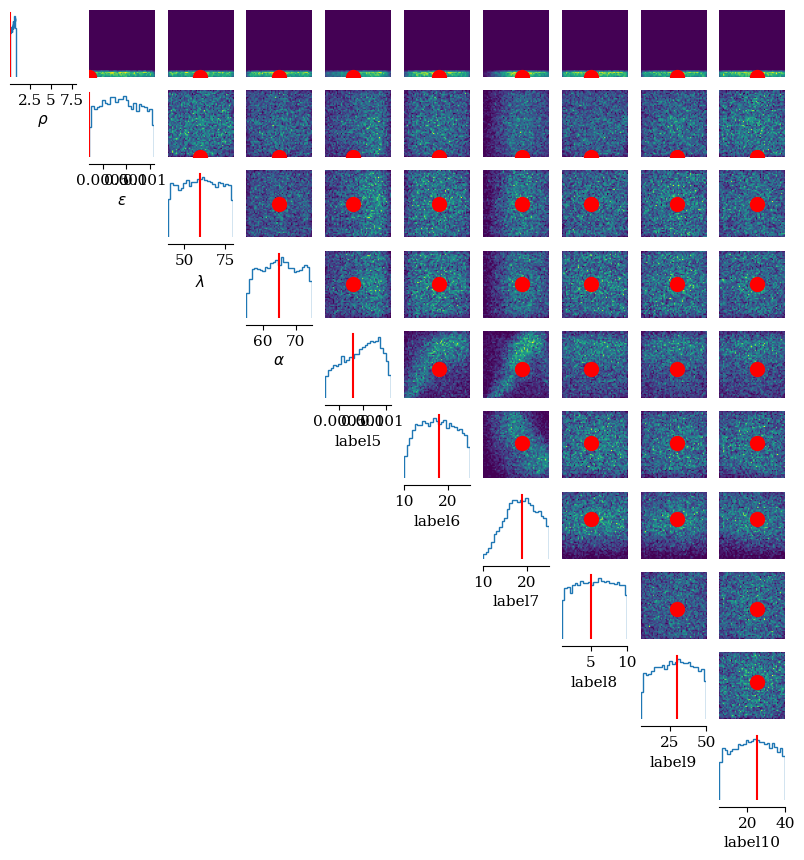

In [4]:
# 100,000
socialcare = np.loadtxt("../../exp_dir/socialcare/1715098277.0581114/samples.txt")
plt.rcParams.update({'font.size':11}) # something about latex font
_ = analysis.pairplot(socialcare, limits=[[0.1,8], [0.0002, 0.0016], [40,80], [55, 75], [0.0002, 0.0016], [10, 25], [10, 25], [1, 10], [5, 50], [5, 40]], 
                      points=[np.array([0.1, 0.0002, 60.0, 65, 0.0008, 18.0, 19.0, 5.0, 30.0, 25.0])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$", "label5", "label6", "label7", "label8", "label9", "label10"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

In [20]:
file_name = "1715151754.033255"
with open(f"../../exp_dir/socialcare/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

In [14]:
posterior_samples = posterior.sample((200,))

Drawing 200 posterior samples: 8234it [00:00, 18721.54it/s]                       


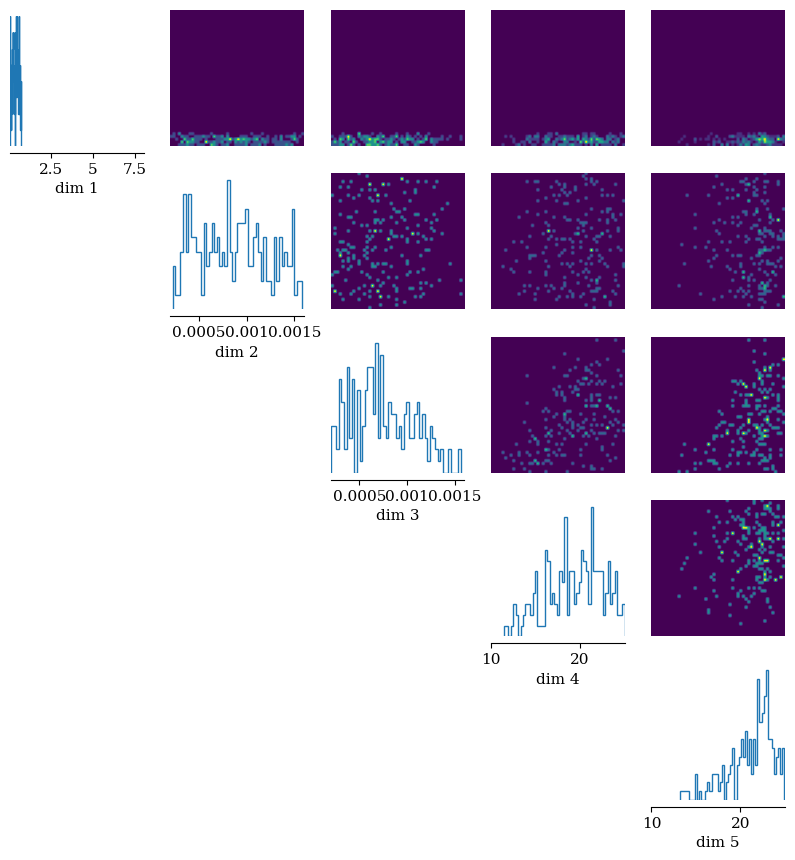

In [16]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

_ = pairplot(posterior_samples, limits=[[0.1,8], [0.0002, 0.0016], [0.0002, 0.0016], [10, 25], [10, 25]], figsize=(10, 10))

In [17]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

Drawing 1000 posterior samples: 8893it [00:00, 16951.87it/s]                        


In [18]:
print("Eigenvalues: \n", e_vals, "\n")
print("Eigenvectors: \n", e_vecs)

Eigenvalues: 
 tensor([9.1146e-07, 9.6685e-07, 1.7223e-06, 4.1335e-06, 6.1561e-06]) 

Eigenvectors: 
 tensor([[ 0.4688,  0.8544, -0.2236, -0.0154,  0.0038],
        [-0.8264,  0.5136,  0.2291,  0.0033, -0.0288],
        [ 0.2202,  0.0406,  0.6088, -0.0684, -0.7580],
        [ 0.1053,  0.0263,  0.3846, -0.8175,  0.4147],
        [ 0.1943,  0.0626,  0.6156,  0.5716,  0.5027]])


In [26]:
plt.hist(samples_np[:, 2], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior Samples')
plt.show()

NameError: name 'samples_np' is not defined